<a href="https://colab.research.google.com/github/mnhtm187/Minh-T-m-31241027094/blob/main/Final_Project_loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install geopy folium ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.0 MB/s eta 0:00:00


In [2]:
import folium
from folium.plugins import MousePosition
import geopy
from geopy.geocoders import Nominatim
from IPython.display import display

# Hàm lấy tên địa phương từ tọa độ
def get_location_name(lat, lon):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.reverse((lat, lon), language="vi")
    return location.address if location else "Không tìm thấy địa chỉ"

# Tạo bản đồ
mymap = folium.Map(location=[10.776532, 106.700828], zoom_start=12, tiles="openstreetmap")

# Thêm chức năng hiển thị tọa độ khi click vào bản đồ
def on_click(e):
    lat, lon = e.latlng
    address = get_location_name(lat, lon)
    popup = folium.Popup(f"Tọa độ: {lat}, {lon}<br>Địa chỉ: {address}", max_width=300)
    folium.Marker(location=[lat, lon], popup=popup).add_to(mymap)

mymap.add_child(folium.LatLngPopup())  # Hiển thị popup khi click
display(mymap)



In [3]:
import folium
from geopy.geocoders import Nominatim
from ipywidgets import widgets, VBox
from IPython.display import display, clear_output

# Hàm tìm kiếm địa điểm
def search_location(place_name):
    geolocator = Nominatim(user_agent="my_map_app")
    try:
        location = geolocator.geocode(place_name + ", Vietnam")  # Thêm 'Vietnam' để chính xác hơn
        if location:
            return location.latitude, location.longitude, f"✅ Tìm thấy: {location.address}"
        else:
            return None, None, "❌ Không tìm thấy địa điểm"
    except Exception as e:
        return None, None, f"⚠️ Lỗi: {e}"

# Widget nhập địa điểm
search_box = widgets.Text(value="Quảng Ngãi", placeholder="Nhập tên địa điểm...", layout=widgets.Layout(width="300px"))
search_button = widgets.Button(description="🔍 Tìm kiếm")
output_label = widgets.Output()

# Sự kiện khi bấm nút tìm kiếm
def on_search_clicked(b):
    place_name = search_box.value.strip()

    if not place_name:
        with output_label:
            output_label.clear_output()
            display("⚠️ Vui lòng nhập tên địa điểm!")
        return

    lat, lon, message = search_location(place_name)

    with output_label:
        output_label.clear_output()
        display(message)

    if lat and lon:
        # Tạo lại bản đồ mới
        mymap = folium.Map(location=[lat, lon], zoom_start=12, tiles="openstreetmap")
        folium.Marker([lat, lon], popup=f"📍 {place_name}", tooltip=place_name).add_to(mymap)

        # Hiển thị bản đồ mới
        clear_output(wait=True)
        display(VBox([search_box, search_button, output_label]))
        display(mymap)

# Gán sự kiện click cho nút tìm kiếm
search_button.on_click(on_search_clicked)

# Hiển thị giao diện ban đầu
display(VBox([search_box, search_button, output_label]))



  Món ăn đặc trưng


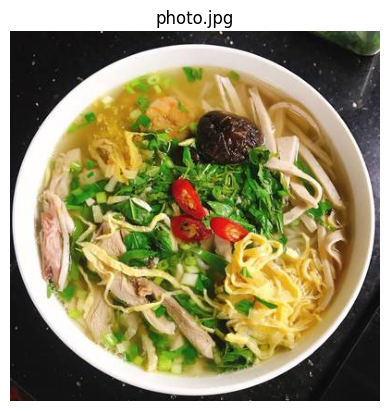

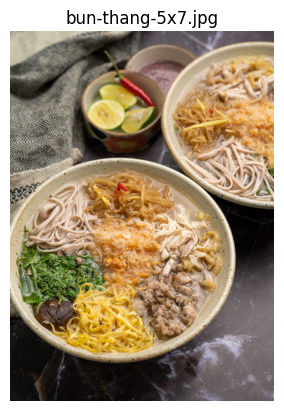

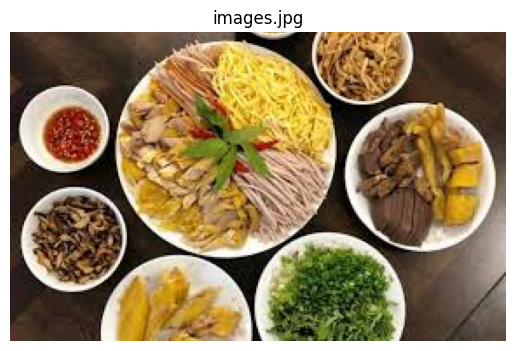

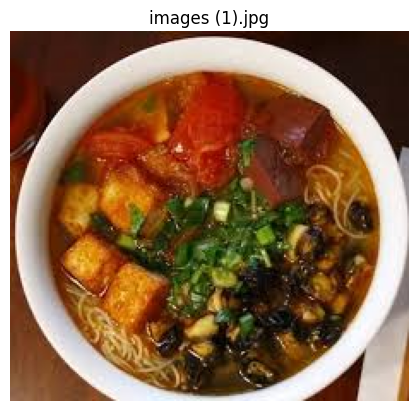

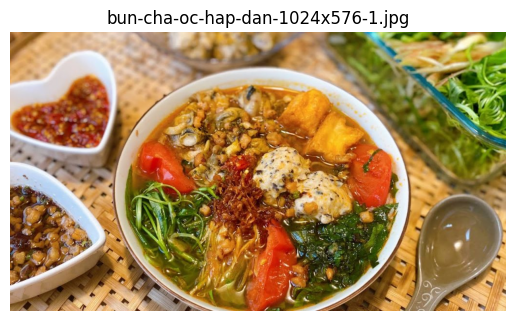

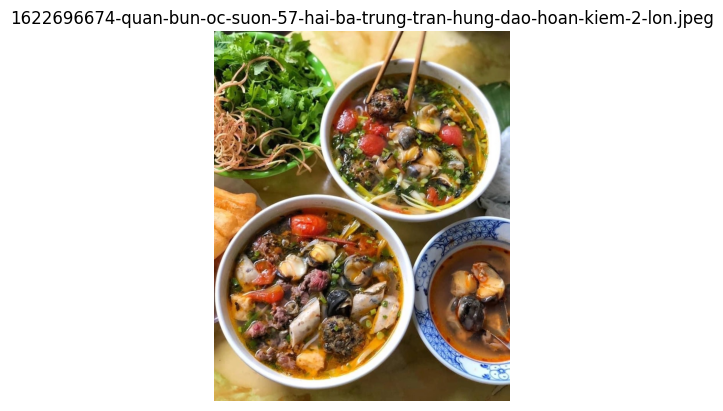

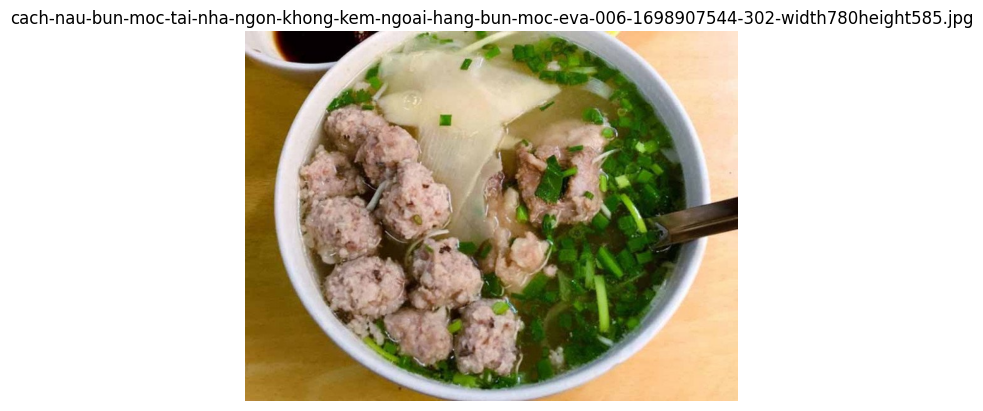

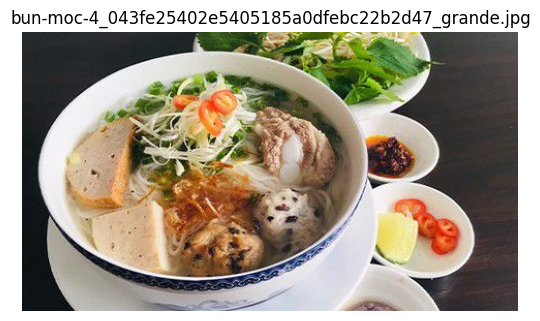

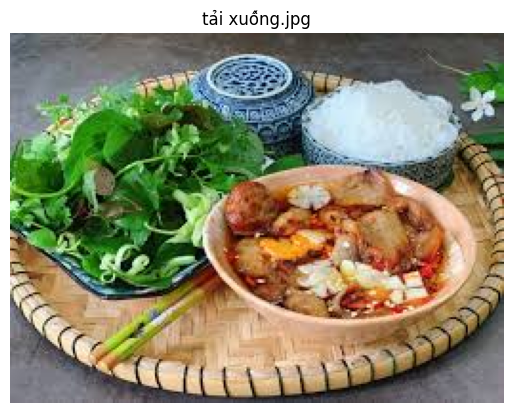

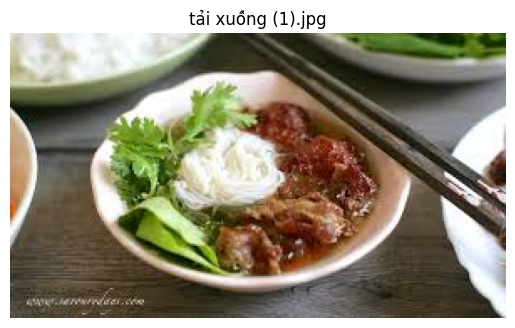

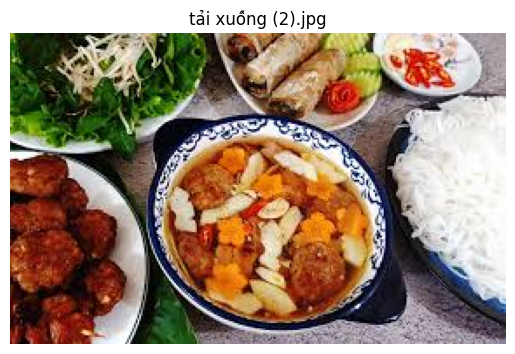

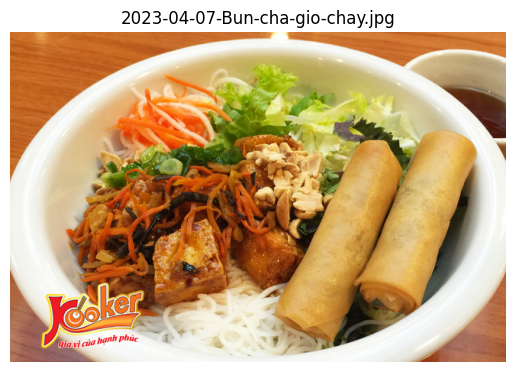

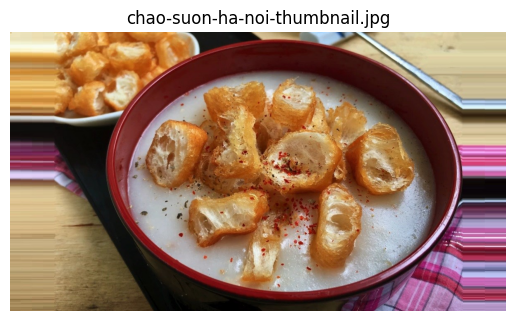

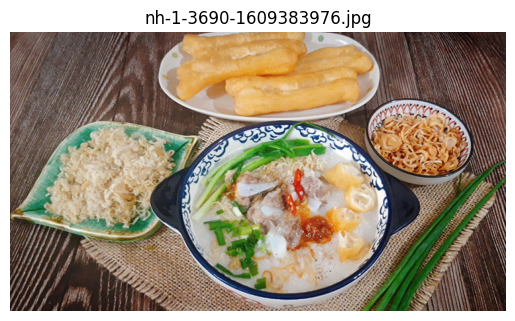

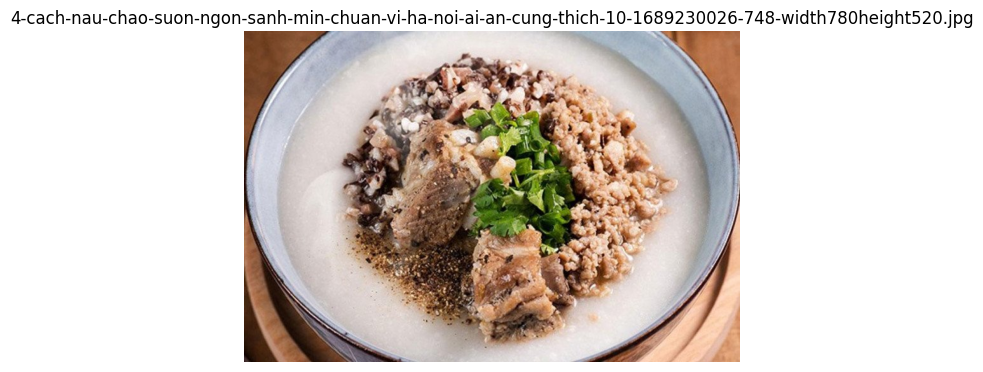

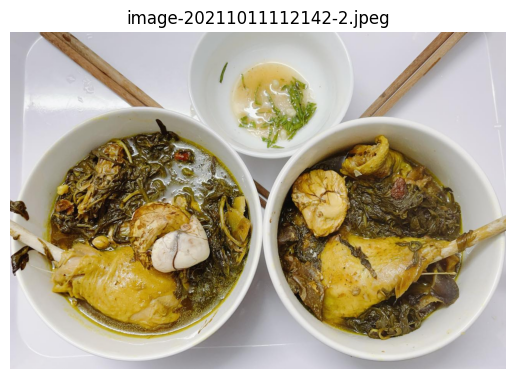

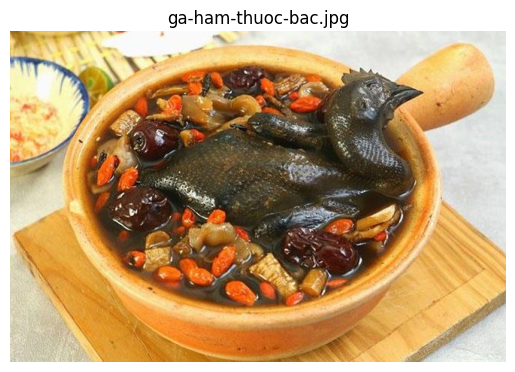

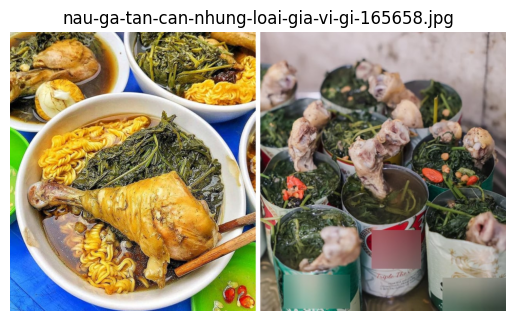

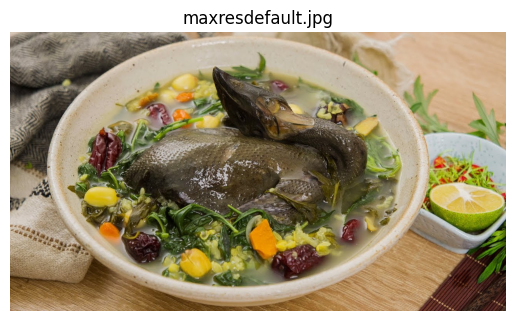

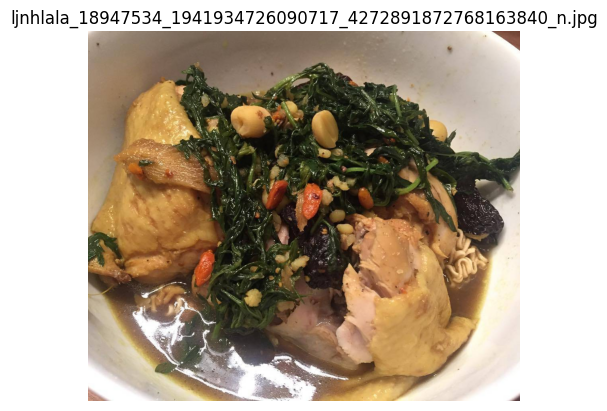

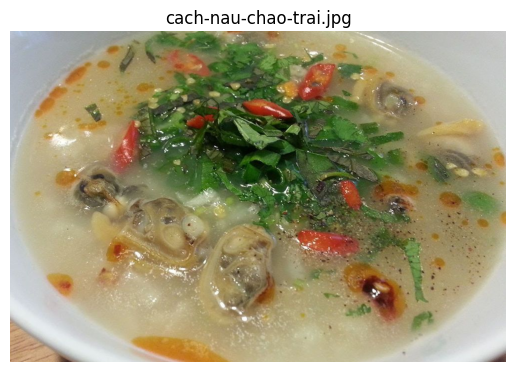

In [12]:
#  Đường dẫn thư mục dữ liệu trong Google Drive
base_path = '/content/drive/MyDrive/Images'  # Thay bằng thư mục bạn đã lưu

# Widget giao diện
search_box = widgets.Text(value="", placeholder="Nhập tên tỉnh/thành...", layout=widgets.Layout(width="300px"))
search_button = widgets.Button(description="🔍 Tìm kiếm")
output_label = widgets.Output()

#  Xử lý khi người dùng bấm nút
def on_search_clicked(b):
    place_name = search_box.value.strip()
    if not place_name:
        with output_label:
            output_label.clear_output()
            display("⚠️ Vui lòng nhập tên địa điểm!")
        return

    #  Tìm toạ độ bản đồ
    lat, lon, message = search_location(place_name)

    with output_label:
        output_label.clear_output()
        display(message)

    if lat and lon:
        #  Tạo bản đồ
        mymap = folium.Map(location=[lat, lon], zoom_start=12)
        folium.Marker([lat, lon], popup=f" {place_name}", tooltip=place_name).add_to(mymap)

        # 🖼️ Hiển thị ảnh món ăn & địa điểm du lịch
        tinh_folder = os.path.join(base_path, place_name)
        mon_an_path = os.path.join(tinh_folder, "Món ăn")
        dia_diem_path = os.path.join(tinh_folder, "Tham quan")


        clear_output(wait=True)
        display(VBox([search_box, search_button, output_label]))
        display(mymap)

        hien_thi_anh_trong_folder(" Món ăn đặc trưng", mon_an_path)
        hien_thi_anh_trong_folder(" Địa điểm tham quan", dia_diem_path)

#  Kích hoạt sự kiện nút
search_button.on_click(on_search_clicked)

#  Hiển thị giao diện ban đầu
display(VBox([search_box, search_button, output_label]))


